In [4]:
import os
import numpy as np
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
from shutil import copyfile
import pandas as pd
%matplotlib inline

train_dir = "train/"

In [5]:
# Create folders for  training data and validation randomly splitted 
nw_train = os.mkdir("nw_train")
nw_valid = os.mkdir("nw_valid")

In [6]:
nw_train_dir = "fish/nw_train/"
nw_valid_dir = "fish/nw_valid/"

ALB  :  1719
BET  :  200
DOL  :  117
LAG  :  67
NoF  :  465
OTHER  :  299
SHARK  :  176
YFT  :  734
Total images present in the training dataset :  3777


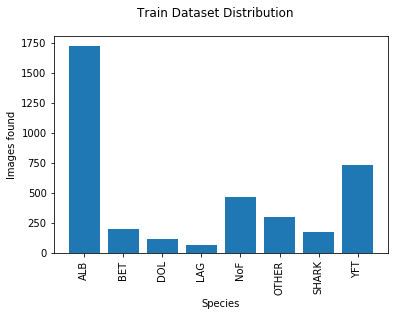

In [7]:
#classes = os.listdir(train_dir) # Get all the classes from the original train directory
species_count= []
classes = []

for cls in os.listdir(train_dir):
    if not (cls == '.DS_Store'):
        classes.append(cls)    
classes.sort()

for cls in classes:
        species_count.append(len(os.listdir(train_dir+cls)))

for index in range(len(classes)):
    print(classes[index]," : ", species_count[index])

#Total Images Count
print("Total images present in the training dataset : ",sum(species_count))

#Train Dataset Distribution
#Creation of a Bar Plot
x = range(len(classes))
plt.bar(x, species_count)
plt.xticks(x, classes, rotation=90)
plt.suptitle('Train Dataset Distribution')
plt.xlabel('Species')
plt.ylabel('Images found')
plt.show()

In [11]:
#create class folders in training and validation directories
for category in classes:
    if not (category == ".DS_Store"): #Ignoring .DS_Store class, as it is irrelevant.
        os.mkdir(nw_train_dir+category)
        os.mkdir(nw_valid_dir+category)

In [12]:
#Creation of Validation and New Training Datasets from Training Dataset
for species in classes:
    
    class_root_path = train_dir + species + "/"
    nw_train_path = nw_train_dir + species + "/"
    nw_valid_path = nw_valid_dir + species + "/"
    
    validation_threshold = 0.7
    split_index = int(validation_threshold * species_count)
    
    #REATING A LIST OF IMAGE NAMES IN THE SPECIES FOLDER
    species_image_list = os.listdir(class_root_path)
    #Before spliting the data set, we shuffle it randomnly for generalisation
    np.random.shuffle(species_image_list)
    
    #SEGREGATING THE LIST INTO TRAIN AND VALID DATASET
    #IN RATIO OF 7:3 = TRAIN:VALID
    
    train = species_image_list[:split_index]
    valid = species_image_list[split_index:]
    
    #COPYING THE IMAGES FROM SOURCE TO NEW TRAIN FOLDER
    for img in train:
        src = class_root_path + img
        destine = nw_train_path + img
        copyfile(src, destine)
    
    #COPYING THE IMAGES FROM SOURCE TO VALID FOLDER
    for img in valid:
        src = class_root_path + img
        destine = nw_valid_path + img
        copyfile(src, destine)

In [9]:
#Creation of Validation and New Training Datasets from Training Dataset
train_count = []
valid_count = []

for species in classes:
    train_count.append(len(os.listdir(nw_train_dir+species)))
    valid_count.append(len(os.listdir(nw_valid_dir+species)))

#Total Images Count
print("Total images present in the training dataset : ",sum(species_count))
print("Train Dataset Count :",sum(train_count))
print("Valid Dataset Count :",sum(valid_count))    

Total images present in the training dataset :  3777
Train Dataset Count : 2640
Valid Dataset Count : 1137


/home/aind2/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


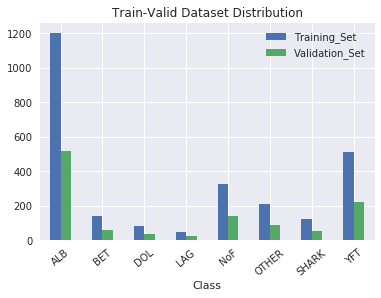

In [17]:
df = pd.DataFrame(data={'Class': classes,
         'Training_Set':train_count,
        'Validation_Set':valid_count})
df.plot.bar(x = 'Class', y = ['Training_Set', 'Validation_Set'], rot = 40,title="Train-Valid Dataset Distribution")